# Proyecto 03
## Visión Por Computadora

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
images_dir = 'imagenes/'
input_dir = 'input0'

(-0.5, 570.5, 305.5, -0.5)

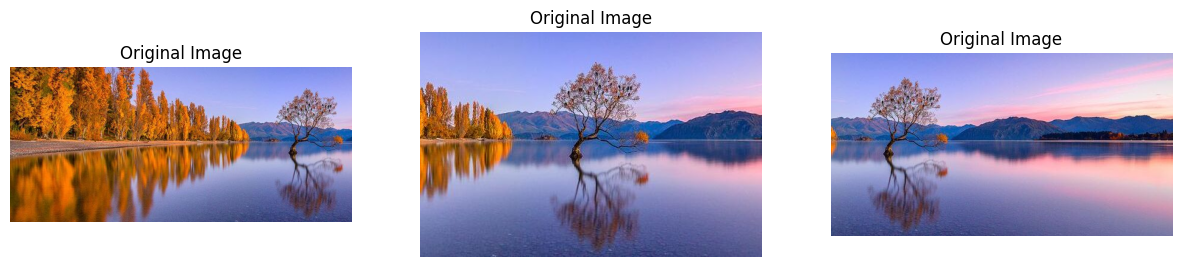

In [16]:

# Create a 1x3 subplot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
image_2 = cv2.imread(os.path.join(images_dir, input_dir, 'i2.jpeg'))
ax[0].imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

image_0 = cv2.imread(os.path.join(images_dir, input_dir, 'i0.jpeg'))
ax[1].imshow(cv2.cvtColor(image_0, cv2.COLOR_BGR2RGB))
ax[1].set_title('Original Image')
ax[1].axis('off')

image_1 = cv2.imread(os.path.join(images_dir, input_dir, 'i1.jpeg'))
ax[2].imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
ax[2].set_title('Original Image')
ax[2].axis('off')



In [20]:
# Print height for the images
print('Image 0 height:', image_0.shape[0])
print('Image 1 height:', image_1.shape[0])
print('Image 2 height:', image_2.shape[0])


Image 0 height: 306
Image 1 height: 306
Image 2 height: 306


### 2

In [29]:
image_0_rgb = cv2.cvtColor(image_0, cv2.COLOR_BGR2RGB)
image_1_rgb = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2_rgb = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

In [30]:
sift = cv2.SIFT_create()
keypoints_0, descriptors_0 = sift.detectAndCompute(image_0, None)
keypoints_1, descriptors_1 = sift.detectAndCompute(image_1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(image_2, None)
image_0_kp = cv2.drawKeypoints(image_0_rgb, keypoints_0, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_1_kp = cv2.drawKeypoints(image_1_rgb, keypoints_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image_2_kp = cv2.drawKeypoints(image_2_rgb, keypoints_2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


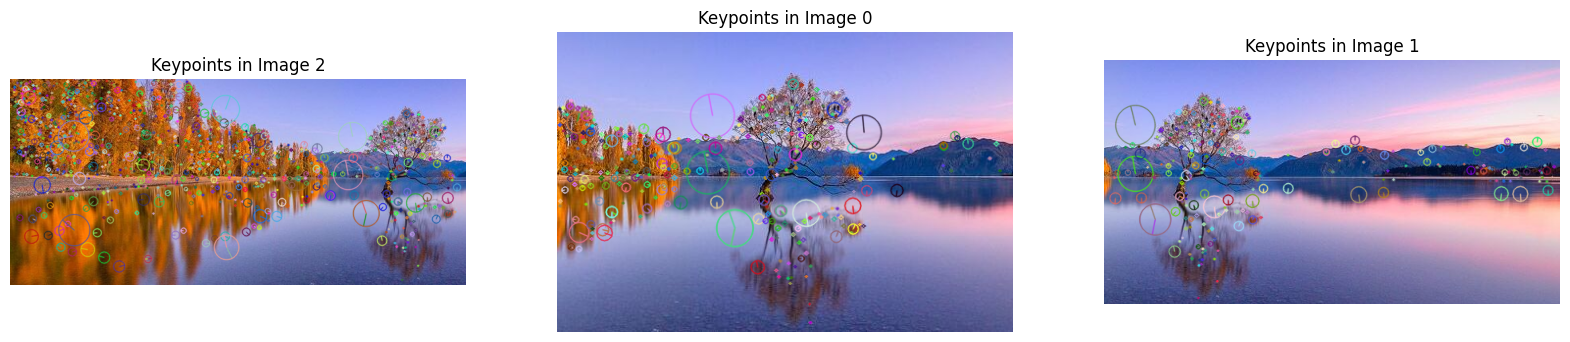

In [34]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(image_2_kp)
plt.title('Keypoints in Image 2')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_0_kp)
plt.title('Keypoints in Image 0')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_1_kp)
plt.title('Keypoints in Image 1')
plt.axis('off')


plt.show()

In [49]:
def find_homography(image_data_1, image_data_2):
    """
    Find the homography matrix for a pair of images using SIFT, FLANN, and RANSAC.
    """
    
    sift = cv2.SIFT_create()
    
    # Find the keypoints and descriptors with SIFT
    keypoints_1, descriptors_1 = sift.detectAndCompute(image_data_1, None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(image_data_2, None)
    
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(descriptors_1, descriptors_2, k=2)
    good_matches = [m for m, n in matches if m.distance < 0.7 * n.distance]
    
    MIN_MATCH_COUNT = 10
    
    if len(good_matches) > MIN_MATCH_COUNT:
        src_pts = np.float32([keypoints_1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([keypoints_2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        
        return M, keypoints_1, keypoints_2, good_matches, mask.ravel().tolist()
    else:
        print(f"Not enough matches are found - {len(good_matches)}/{MIN_MATCH_COUNT}")
        return None, None, None, None, None

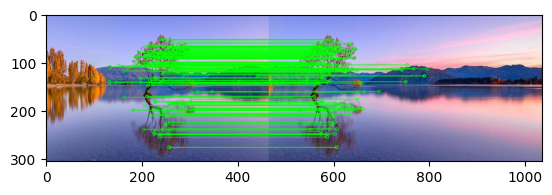

(<matplotlib.image.AxesImage at 0x17579d090>, None)

In [52]:
H, kp1, kp2, good_matches, mask = find_homography(image_0, image_1)
matchesMask = mask
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(image_0_rgb, kp1, image_1_rgb, kp2, good_matches, None, **draw_params)
plt.imshow(img3, 'gray'),plt.show()

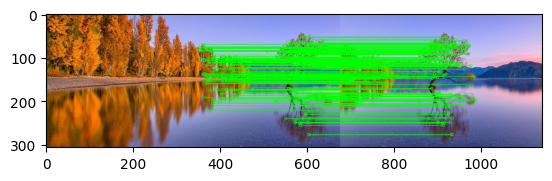

(<matplotlib.image.AxesImage at 0x175e3a7d0>, None)

In [57]:
# Now between image0 and image2
H, kp1, kp2, good_matches, mask = find_homography(image_2, image_0)
matchesMask = mask
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
									 singlePointColor = (255,0,0),
									 matchesMask = matchesMask, # draw only inliers
									 flags = 2)
img3 = cv2.drawMatches(image_2_rgb, kp1, image_0_rgb, kp2, good_matches, None, **draw_params)
plt.imshow(img3, 'gray'),plt.show()
